# Quantifying uncertainty in Neural Networks

This is a toy regression problem to illustrate how to use Monte Carlo Dropout ([Gal, Ghahramani 2015](https://arxiv.org/abs/1506.02142)) to estimate uncertainy on this toy regression problem.

In [1]:
import matplotlib.pyplot as plt
import torch
from torch import Tensor
import torch.nn as nn

In [2]:
def gt_func(x):
    return (10 - 0.2 * x**3 + 0.5*x - 1.2* x**2 + 0.08 * x**4) ** 0.4

In [3]:
xgt = torch.arange(-7,7,0.02)

In [4]:
ygt = gt_func(xgt)

In [5]:
xsam = torch.Tensor([-5, -4, -3.5, -0.5, 0.5, 2.5, 3, 4, 4.5])
ysam = gt_func(xsam)

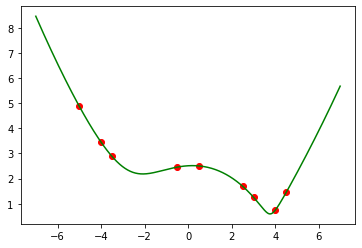

In [6]:
plt.plot(xgt,ygt, color='green')
plt.scatter(xsam, ysam, color='red')
plt.show()

In [7]:
class FC_Regress(nn.Module):
    
    def __init__(self, hidden1:int, hidden2:int, dropout:float=0.5):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, hidden1),
            nn.Tanh(),
            nn.Dropout(dropout),
            nn.Linear(hidden1, hidden2),
            nn.Tanh(),
            #nn.Dropout(dropout),  # really has a hard time converging with this
            nn.Linear(hidden2, 1),
        )
        
    def forward(self, x:Tensor) -> Tensor:
        a = self.layers(x)
        return a

In [8]:
import regr_unc
from importlib import reload
reload(regr_unc)

<module 'regr_unc' from '/home/leo/dev/geometric-intuition/quantifying-uncertainty/regr_unc.py'>

In [9]:
def viz(net, xdata, ydata, filename:str=None):
    x = torch.arange(-7,7,0.02)
    x = x.unsqueeze(-1)
    with torch.no_grad():
        #net.eval()
        y, yerr = regr_unc.mc_dropout_mu_stdev(net, x, n=200)
        fix = lambda a: a.cpu().view(-1).numpy()
        x = fix(x)
        y = fix(y)
        yerr = fix(2*yerr)

        plt.figure(figsize=(12,6))
        plt.ylim(-1,9)
        plt.plot(xgt,ygt, color='green')
        plt.plot(x, y, color='blue')
        plt.fill_between(x, y-yerr, y+yerr, color='#ccccff', alpha=0.7)
        plt.scatter(xdata, ydata, color='red')
        if filename:
            plt.savefig(filename)
        plt.show()

In [10]:
def train(xdata:Tensor, ydata:Tensor, ensemble_size:int=1, filename:str=None):
    assert len(xdata.shape) == 1
    xdata = xdata.unsqueeze(-1)
    assert len(ydata.shape) == 1
    ydata = ydata.unsqueeze(-1)
    
    torch.random.manual_seed(123)
    net = FC_Regress(128, 128, dropout=0.75)
    opt = torch.optim.Adam(params=net.parameters(), lr=0.001)
    for e in range(10001):
        net.train()
        opt.zero_grad()
        yhat = net(xdata)
        loss = torch.sqrt(torch.mean((yhat-ydata)**2))
        loss.backward()
        opt.step()
        
        if int(e ** 0.25) == e ** 0.25:
            print(f"Epoch {e} loss is {loss:.3f}")
    if filename:
        viz(net, xdata, ydata, filename=filename)


[7, 1, 5, 6, 2, 3, 8, 4, 0]
Epoch 0 loss is 0.357
Epoch 1 loss is 0.061
Epoch 16 loss is 0.184
Epoch 81 loss is 0.329
Epoch 256 loss is 0.097
Epoch 625 loss is 0.039
Epoch 1296 loss is 0.083
Epoch 2401 loss is 0.018
Epoch 4096 loss is 0.041
Epoch 6561 loss is 0.104
Epoch 10000 loss is 0.024


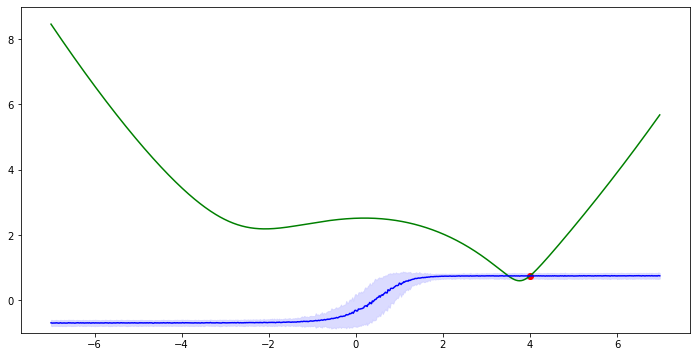

Epoch 0 loss is 2.855
Epoch 1 loss is 2.398
Epoch 16 loss is 1.560
Epoch 81 loss is 1.086
Epoch 256 loss is 0.938
Epoch 625 loss is 0.246
Epoch 1296 loss is 0.081
Epoch 2401 loss is 0.024
Epoch 4096 loss is 0.028
Epoch 6561 loss is 0.042
Epoch 10000 loss is 0.020


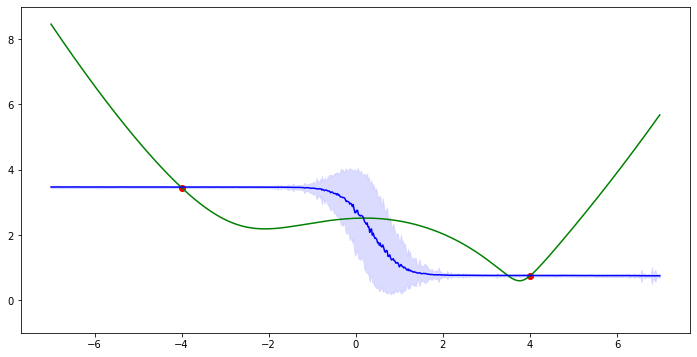

Epoch 0 loss is 2.552
Epoch 1 loss is 2.170
Epoch 16 loss is 1.789
Epoch 81 loss is 0.672
Epoch 256 loss is 0.502
Epoch 625 loss is 0.239
Epoch 1296 loss is 0.051
Epoch 2401 loss is 0.075
Epoch 4096 loss is 0.028
Epoch 6561 loss is 0.025
Epoch 10000 loss is 0.008


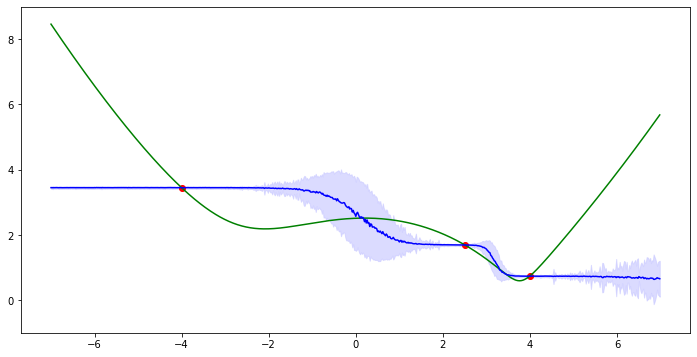

Epoch 0 loss is 2.262
Epoch 1 loss is 1.928
Epoch 16 loss is 1.722
Epoch 81 loss is 0.534
Epoch 256 loss is 0.689
Epoch 625 loss is 0.294
Epoch 1296 loss is 0.061
Epoch 2401 loss is 0.083
Epoch 4096 loss is 0.037
Epoch 6561 loss is 0.029
Epoch 10000 loss is 0.030


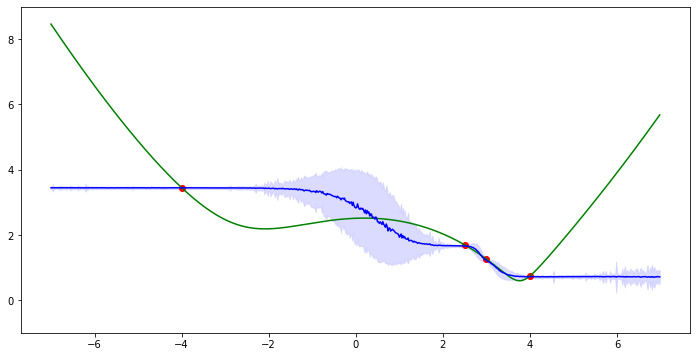

Epoch 0 loss is 2.422
Epoch 1 loss is 2.256
Epoch 16 loss is 1.715
Epoch 81 loss is 0.572
Epoch 256 loss is 0.671
Epoch 625 loss is 0.375
Epoch 1296 loss is 0.195
Epoch 2401 loss is 0.204
Epoch 4096 loss is 0.063
Epoch 6561 loss is 0.041
Epoch 10000 loss is 0.012


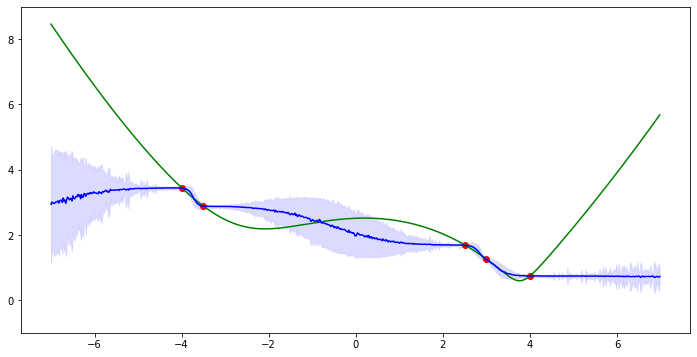

Epoch 0 loss is 2.473
Epoch 1 loss is 2.238
Epoch 16 loss is 1.514
Epoch 81 loss is 0.579
Epoch 256 loss is 0.464
Epoch 625 loss is 0.368
Epoch 1296 loss is 0.184
Epoch 2401 loss is 0.112
Epoch 4096 loss is 0.096
Epoch 6561 loss is 0.049
Epoch 10000 loss is 0.030


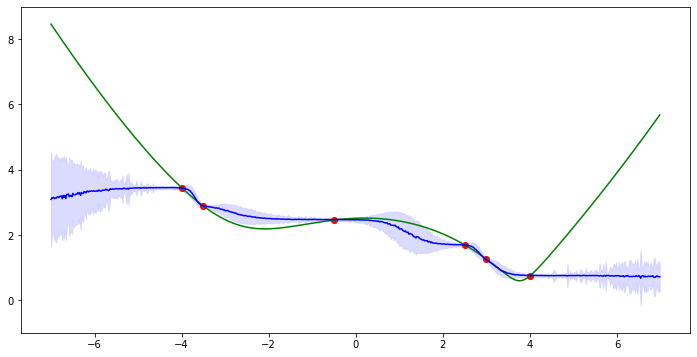

Epoch 0 loss is 2.328
Epoch 1 loss is 2.118
Epoch 16 loss is 1.489
Epoch 81 loss is 0.575
Epoch 256 loss is 0.473
Epoch 625 loss is 0.382
Epoch 1296 loss is 0.310
Epoch 2401 loss is 0.229
Epoch 4096 loss is 0.263
Epoch 6561 loss is 0.105
Epoch 10000 loss is 0.037


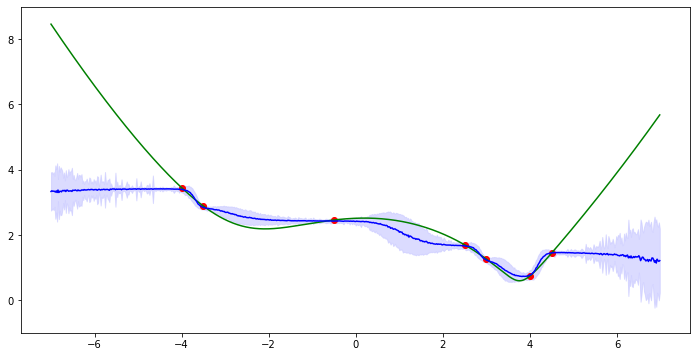

Epoch 0 loss is 2.324
Epoch 1 loss is 2.125
Epoch 16 loss is 1.381
Epoch 81 loss is 0.600
Epoch 256 loss is 0.446
Epoch 625 loss is 0.370
Epoch 1296 loss is 0.258
Epoch 2401 loss is 0.224
Epoch 4096 loss is 0.229
Epoch 6561 loss is 0.091
Epoch 10000 loss is 0.037


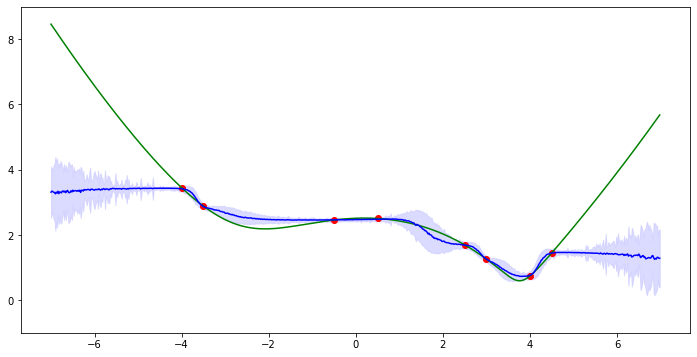

Epoch 0 loss is 2.820
Epoch 1 loss is 2.593
Epoch 16 loss is 1.709
Epoch 81 loss is 0.635
Epoch 256 loss is 0.651
Epoch 625 loss is 0.619
Epoch 1296 loss is 0.411
Epoch 2401 loss is 0.222
Epoch 4096 loss is 0.241
Epoch 6561 loss is 0.066
Epoch 10000 loss is 0.072


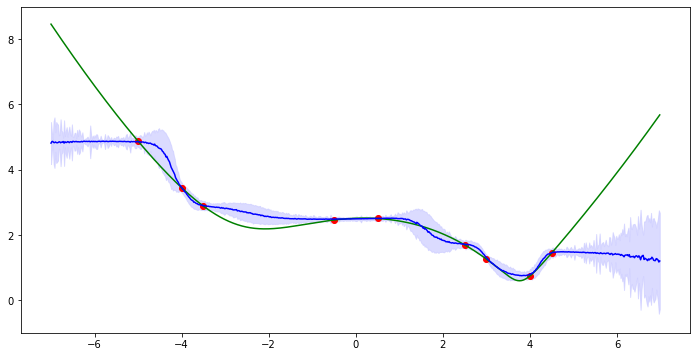

In [11]:
N = len(xsam)
#order = list(range(N))
#random.seed(123)
#random.shuffle(order)
order = [7, 1, 5, 6, 2, 3, 8, 4, 0]
print(order)
for i in range(N):
    idx = order[:(i+1)]
    x = xsam[idx]
    y = ysam[idx]
    
    train(x,y, filename=f"mcdo-{i+1}.png")